# Regresión logística

Función de verosimilitud (Likelihood functions)


In [1]:
#Importación  de bibliotecas
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_digits

# Cargamos el dataset

digits = load_digits()
digits.data.shape # Son objetos de sklearn, tipo 'bunch' (conjunto, colección, grupo, ramo)

(1797, 64)

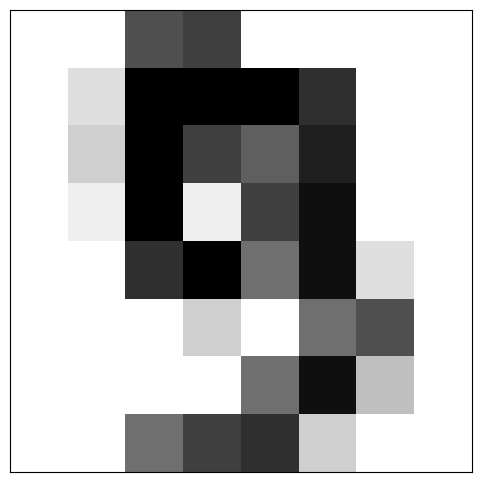

In [15]:
# Crea una figura de Matplotlib
fig = plt.figure(figsize=(6, 6))

# Añade un solo subplot para mostrar la imagen
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])

# Muestra la imagen seleccionada
ax.imshow(digits.images[9], cmap=plt.cm.binary, interpolation='nearest')

# Muestra la figura
plt.show()

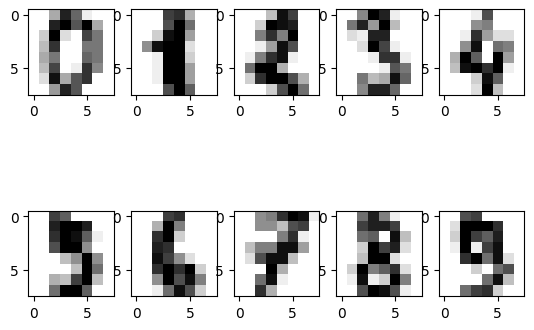

In [11]:
# Veamos los dígitos en imagenes

fig = plt.figure() 

for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1) # yticks=[], xticks=[]
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

In [4]:
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,test_size=0.3) # 75% train and 25% test

In [5]:
# Especificamos el modelos
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter = 5000) # especifico el modelo

In [6]:
# Entrenamos el modelo

logisticRegr.fit(Xtrain, ytrain) #Entreno el modelo

LogisticRegression(max_iter=5000)

In [14]:
#Valoremos la  precisión (accuracy) del modelo de regresión logística 
from sklearn.metrics import accuracy_score
trainaccuracy= accuracy_score(ytrain,logisticRegr.predict(Xtrain))
print('La precisión del conjunto de entrenamiento es de:', trainaccuracy)
testaccuracy= accuracy_score(ytest,logisticRegr.predict(Xtest))
print('La precisión del conjunto de prueba es de:', testaccuracy)

# La diferencia es normal y deviene de los problema de generalización del ajuste del modelo

La precisión del conjunto de entrenamiento es de: 1.0
La precisión del conjunto de prueba es de: 0.9722222222222222


In [18]:
from sklearn import metrics
metrics.confusion_matrix(ytest,logisticRegr.predict(Xtest))

array([[48,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  0,  0,  1,  1,  0,  0,  0],
       [ 0,  0, 48,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 51,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 56,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 50,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 61,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 58,  0,  0],
       [ 0,  1,  1,  0,  0,  1,  0,  0, 48,  1],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 51]], dtype=int64)

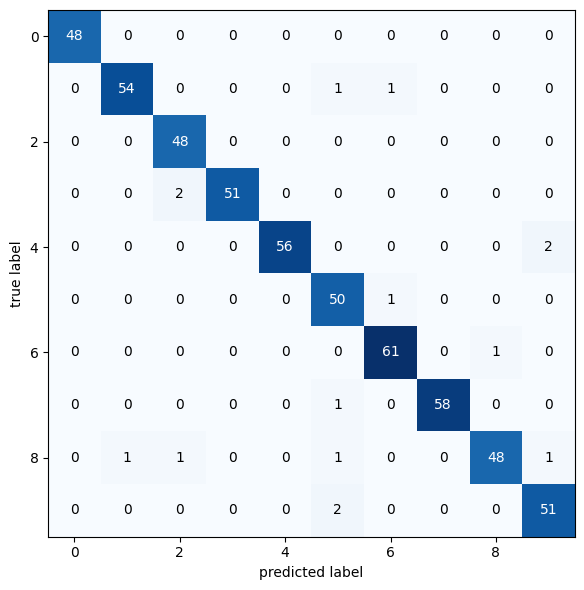

In [7]:
# Evaluamos predicciones con matriz de confusión
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
ypred = logisticRegr.predict(Xtest)
matriz = confusion_matrix(ytest,ypred)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()

In [25]:
print("La precisión de los datos de entrenamiento es del: {} %".format(round((trainaccuracy*100),2)))
print("La precisión de los datos de prueba es del: {} %".format(round((testaccuracy*100),2)))

La precisión de los datos de entrenamiento es del: 100.0 %
La precisión de los datos de prueba es del: 97.22 %
